### 데이터 로드 및 전처리

In [1]:
from keras import models, layers, callbacks, utils, optimizers
from IPython.display import display, Image
from keras.datasets import boston_housing, reuters, cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = boston_housing.load_data()

#### 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
##### 먼저 입력 데이터의 각 특성의 평균을 뺍니다.

In [3]:
mean = x_train_full.mean(axis = 0)
x_train_full -= mean

##### 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
##### 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.

In [4]:
std = x_train_full.std(axis = 0)
x_train_full /= std

##### 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.

In [5]:
x_test -= mean
x_test /= std

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=2023)

print("전체 학습 데이터: {}  레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습용 데이터: {}  레이블: {}".format(x_train.shape, y_train.shape))
print("검증용 데이터: {}  레이블: {}".format(x_val.shape, y_val.shape))
print("테스트용 데이터: {}  레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (404, 13)  레이블: (404,)
학습용 데이터: (282, 13)  레이블: (282,)
검증용 데이터: (122, 13)  레이블: (122,)
테스트용 데이터: (102, 13)  레이블: (102,)


#### 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
###### input_shape은 (train_data.shape[1], )으로 구성합니다.
###### 회귀(예측)을 위한 모델은 loss와 metrics를 mse와 mae로 사용합니다.

In [7]:
model = models.Sequential([layers.Input(shape=(x_train_full.shape[1]), dtype = 'float32'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


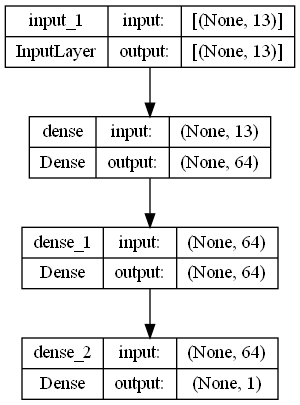

In [8]:
utils.plot_model(model, show_shapes=True)

In [9]:
optimizer = optimizers.RMSprop()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

#### 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.

In [10]:
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/200
3/3 [==============================] - 1s 195ms/step - loss: 538.4144 - mae: 21.4885 - val_loss: 605.9647 - val_mae: 22.3614
Epoch 2/200
3/3 [==============================] - 0s 29ms/step - loss: 506.6187 - mae: 20.7363 - val_loss: 579.4548 - val_mae: 21.7725
Epoch 3/200
3/3 [==============================] - 0s 30ms/step - loss: 483.5065 - mae: 20.1629 - val_loss: 556.6663 - val_mae: 21.2525
Epoch 4/200
3/3 [==============================] - 0s 31ms/step - loss: 462.8917 - mae: 19.6401 - val_loss: 532.6530 - val_mae: 20.6983
Epoch 5/200
3/3 [==============================] - 0s 33ms/step - loss: 441.1719 - mae: 19.0931 - val_loss: 506.7475 - val_mae: 20.0855
Epoch 6/200
3/3 [==============================] - 0s 49ms/step - loss: 418.0984 - mae: 18.4960 - val_loss: 481.0951 - val_mae: 19.4683
Epoch 7/200
3/3 [==============================] - 0s 32ms/step - loss: 395.1990 - mae: 17.8924 - val_loss: 454.9583 - val_mae: 18.8246
Epoch 8/200
3/3 [==============================

##### 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

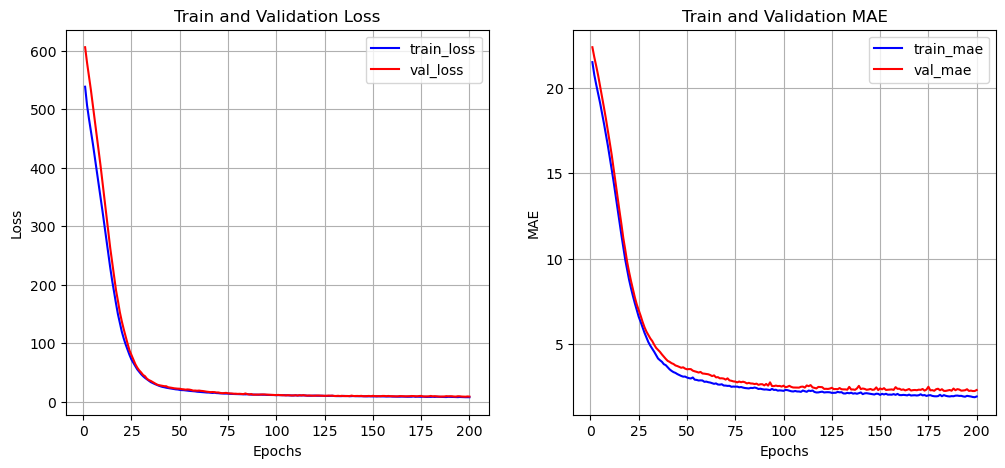

In [11]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

##### 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

In [12]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 19.5910 - mae: 2.8485


[19.590988159179688, 2.8484787940979004]

#### 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

In [13]:
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words= 10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data_full, train_labels_full,
                                                  test_size=0.25,
                                                  random_state=2023)

##### 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.

In [14]:
print("전체 학습 데이터: {}  레이블: {}".format(len(train_data_full), len(set(train_labels_full))))
print("학습용 데이터: {}  레이블: {}".format(len(train_data), len(set(train_labels))))
print("검증용 데이터: {}  레이블: {}".format(len(val_data), len(set(val_labels))))
print("테스트용 데이터: {}  레이블: {}".format(len(test_data), len(set(test_labels))))

전체 학습 데이터: 8982  레이블: 46
학습용 데이터: 6736  레이블: 46
검증용 데이터: 2246  레이블: 46
테스트용 데이터: 2246  레이블: 46


##### 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.

In [15]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

In [16]:
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

##### 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [17]:
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

##### 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

In [18]:
model = models.Sequential([layers.Input(shape=(10000, )),

                           layers.Dense(128),
                           layers.BatchNormalization(),
                           layers.Activation('relu'),
                           layers.Dropout(0.5),

                           layers.Dense(128),
                           layers.BatchNormalization(),
                           layers.Activation('relu'),
                           layers.Dropout(0.1),
                           
                           layers.Dense(46, activation = 'softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

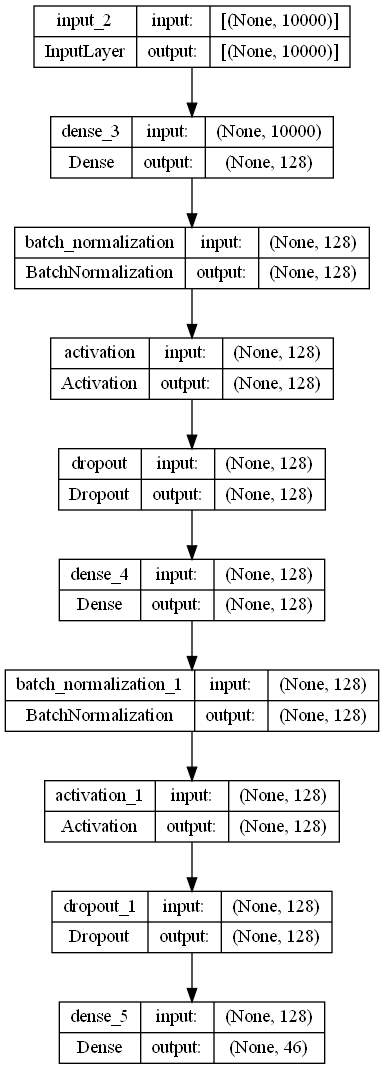

In [19]:
utils.plot_model(model, show_shapes=True)

In [20]:
optimizer = optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

##### 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [21]:
check_point_cb = callbacks.ModelCheckpoint('reuters', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=24, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50, batch_size=1024,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
7/7 [==============================] - 6s 740ms/step - loss: 2.7579 - accuracy: 0.4372 - val_loss: 3.4690 - val_accuracy: 0.6514
Epoch 2/50
7/7 [==============================] - 4s 647ms/step - loss: 1.5704 - accuracy: 0.7003 - val_loss: 3.3283 - val_accuracy: 0.7217
Epoch 3/50
7/7 [==============================] - 4s 600ms/step - loss: 1.2106 - accuracy: 0.7586 - val_loss: 3.1952 - val_accuracy: 0.7453
Epoch 4/50
7/7 [==============================] - 4s 621ms/step - loss: 0.9923 - accuracy: 0.7968 - val_loss: 3.0910 - val_accuracy: 0.7587
Epoch 5/50
7/7 [==============================] - 3s 552ms/step - loss: 0.8245 - accuracy: 0.8276 - val_loss: 2.9678 - val_accuracy: 0.7640
Epoch 6/50
7/7 [==============================] - 4s 656ms/step - loss: 0.7070 - accuracy: 0.8492 - val_loss: 2.8529 - val_accuracy: 0.7689
Epoch 7/50
7/7 [==============================] - 3s 561ms/step - loss: 0.6186 - accuracy: 0.8686 - val_loss: 2.7156 - val_accuracy: 0.7591
Epoch 8/50
7/7 [====

##### 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

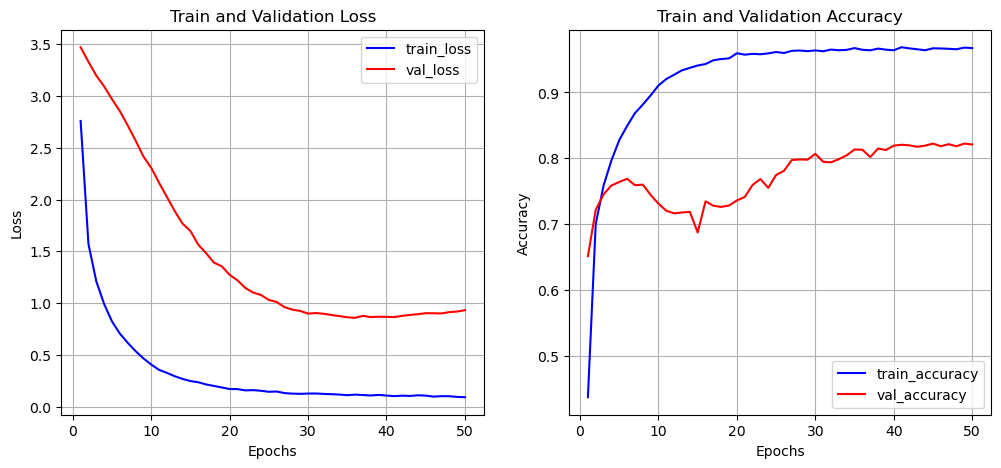

In [22]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##### 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.

In [23]:
model.evaluate(x_test, y_test, verbose = 2)

71/71 - 1s - loss: 1.0441 - accuracy: 0.7983 - 868ms/epoch - 12ms/step


[1.044129729270935, 0.7983080744743347]

##### 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

In [24]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [25]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=2023)

##### 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [26]:
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


##### cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.

In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

##### 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.

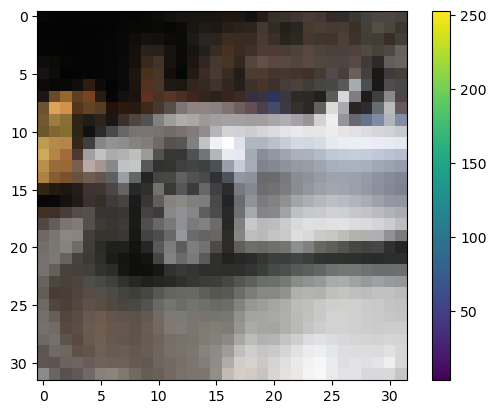

In [28]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

##### 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.

In [29]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


##### 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.

In [30]:
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

In [31]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


##### 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.

In [32]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

##### 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [33]:
model = models.Sequential([layers.Input(shape=(3072, )),

                           layers.Dense(2048),
                           layers.BatchNormalization(),
                           layers.Activation('sigmoid'),
                           layers.Dropout(0.3),

                           layers.Dense(1024),
                           layers.BatchNormalization(),
                           layers.Activation('sigmoid'),
                           layers.Dropout(0.2),
                           
                           layers.Dense(512),
                           layers.BatchNormalization(),
                           layers.Activation('sigmoid'),
                           layers.Dropout(0.1),

                           layers.Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                      

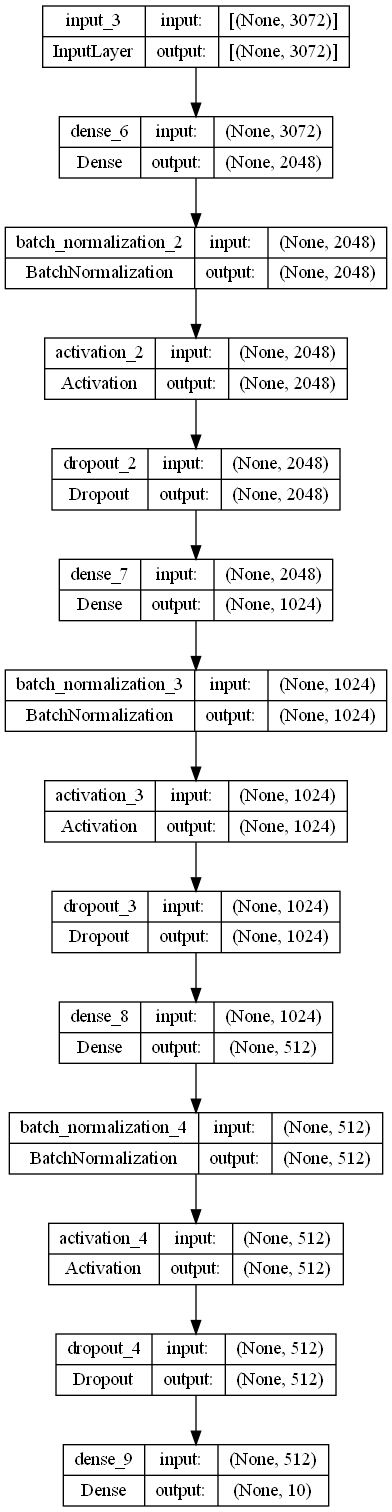

In [34]:
utils.plot_model(model, show_shapes=True)

In [35]:
optimizer = optimizers.RMSprop()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

##### 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [36]:
check_point_cb = callbacks.ModelCheckpoint('cifar10', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=64, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=800, batch_size=8192,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/800
5/5 [==============================] - 20s 4s/step - loss: 2.3291 - accuracy: 0.1908 - val_loss: 2.4317 - val_accuracy: 0.0956
Epoch 2/800
5/5 [==============================] - 17s 4s/step - loss: 1.9826 - accuracy: 0.2808 - val_loss: 2.3689 - val_accuracy: 0.1510
Epoch 3/800
5/5 [==============================] - 16s 3s/step - loss: 1.9167 - accuracy: 0.3148 - val_loss: 2.2060 - val_accuracy: 0.1845
Epoch 4/800
5/5 [==============================] - 15s 3s/step - loss: 1.8867 - accuracy: 0.3270 - val_loss: 2.1891 - val_accuracy: 0.1931
Epoch 5/800
5/5 [==============================] - 13s 3s/step - loss: 1.8720 - accuracy: 0.3256 - val_loss: 2.6807 - val_accuracy: 0.1217
Epoch 6/800
5/5 [==============================] - 13s 3s/step - loss: 1.8651 - accuracy: 0.3370 - val_loss: 2.4449 - val_accuracy: 0.1249
Epoch 7/800
5/5 [==============================] - 14s 3s/step - loss: 1.8416 - accuracy: 0.3448 - val_loss: 2.8985 - val_accuracy: 0.1445
Epoch 8/800
5/5 [==========

##### 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

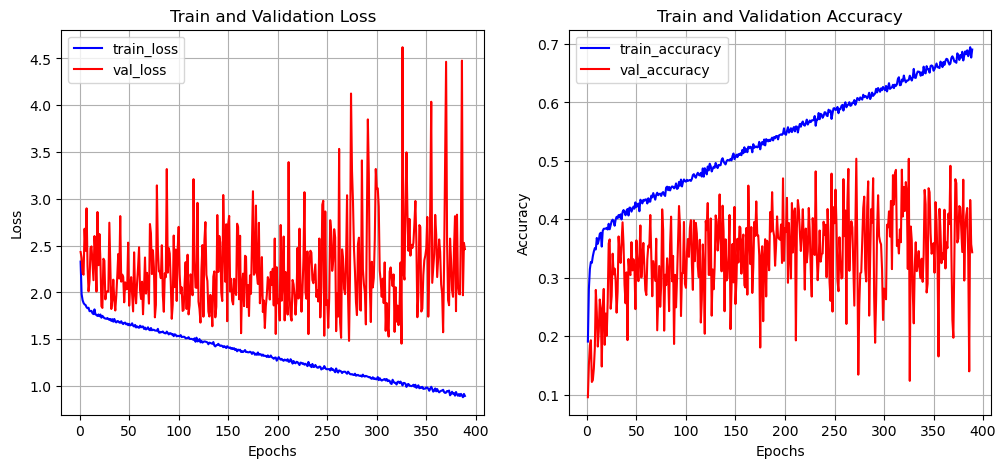

In [37]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##### 테스트 데이터셋을 이용해 모델을 평가합니다.

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.4600 - accuracy: 0.4983


[1.459995150566101, 0.4982999861240387]

# 회고

### 어려웠던 점 / 해결을 위해 시도한 방법 / 문제해결에 성공한 이유 또는 실패한 이유
  
- 그래프가 val_loss의 값이 줄어들지 않아서 어려웠다. 옵티마이저, 배치사이즈, 에폭을 바꿔가면서 시도해봤다.
- train_test_split 코드를 직접 사용해봐야 해서 어려웠다. 드디어 train_test_split의 사용 방법을 제대로 알게 된 것 같아서 기쁘다.

### 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
- utils.plot_model이 버전에 따라 부르는 방식이 달라서 주의해야 한다.
- 그림이 그려지지 않으면 새 창으로 띄워져 있지 않은 지 확인해보기, 실행 횟수 밑에 있는 ...을 눌러서 코드 바로 밑에 띄우게 바꾸기
- 배치 사이즈는 2의 제곱 형태로 주기
- 배치 사이즈가 작으면 epoch을 많이, 배치 사이즈가 작으면 epoch을 적게 해도 된다.
- rmsprop이 속도가 빠른 옵티마이저라는 걸 알았다.
- 버전에 따라 옵티마이저를 문자열 형태로 줘도 된다.
- output 레이어에 softmax 함수를 주면 값이 너무 작은 경우 통과를 못할 수 있다.
- loss를 어떻게 주느냐에 따라 모델의 성능이 확연히 달라질 수 있다.
- model.evaluate()에 verbose = 2로 하면 마지막 결과만 나온다.
- .reshape()을 이용해서 데이터의 형태를 바꿀 수 있다.
- dropout을 얼마로 설정하느냐에 따라 모델의 성능이 달라진다.

### 자기 다짐 / 프로젝트를 진행하면서 느낀점
- 아직 활성화함수의 종류와 특성을 몰라서 공부해야겠다.
- cifar10 문제를 컨볼루션 레이어를 사용했으면 성능이 더 좋아졌을 텐데 못해봐서 아쉽다.